<h1> MLFA LAB-2 SCIKIT-LEARN AND KNN CLASSIFIER TUTORIAL </h1>



```
`# This is formatted as code`
```

#IRIS FLOWER SPECIES DATASET DESCRIPTION
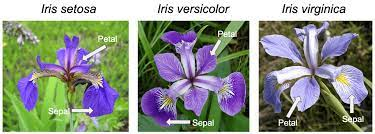


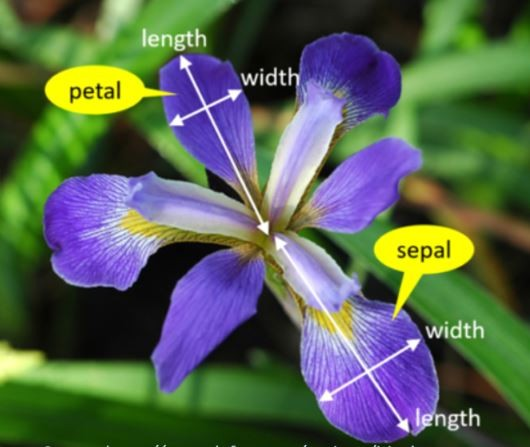

The Iris flower dataset is a classic dataset in the field of machine learning and statistical analysis. It consists of 150 observations of iris flowers, including the sepal and petal length and width for each flower, as well as the species of the flower. The dataset was introduced by British statistician and biologist Ronald Fisher in his 1936 paper, “The use of multiple measurements in taxonomic problems.”

**The variables are:**

sepal_length: Sepal length, in centimeters, used as input.

sepal_width: Sepal width, in centimeters, used as input.

petal_length: Petal length, in centimeters, used as input.

petal_width: Petal width, in centimeters, used as input.

class: Iris Setosa, Versicolor, or Virginica, used as the target.

<h2> 1. LOADING THE IRIS DATASET </h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# showing all columns
pd.set_option('display.max_columns', None)
from sklearn.datasets import load_iris
iris_data = load_iris()


In [ ]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# feature names (variable names)
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
iris_df['Iris type'] = iris_data['target']
iris_df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df['Iris name'] = iris_df['Iris type'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
iris_df.head(150)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:

iris_df_no_target = iris_df.drop(columns=['Iris type'])

# Display summary statistics without the last column
iris_df_no_target.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df_no_target.groupby(['Iris name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
Iris name                                                                  
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
Iris name                                                                   
sentosa                50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
Iris name                                                                   
sentosa                 50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
Iris name                                                              
sentosa                50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

<h2> 2. Pre-processing the Iris dataset  </h2>

Mean Vector:
[5.84333333 3.05733333 3.758      1.19933333]

Covariance Matrix:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


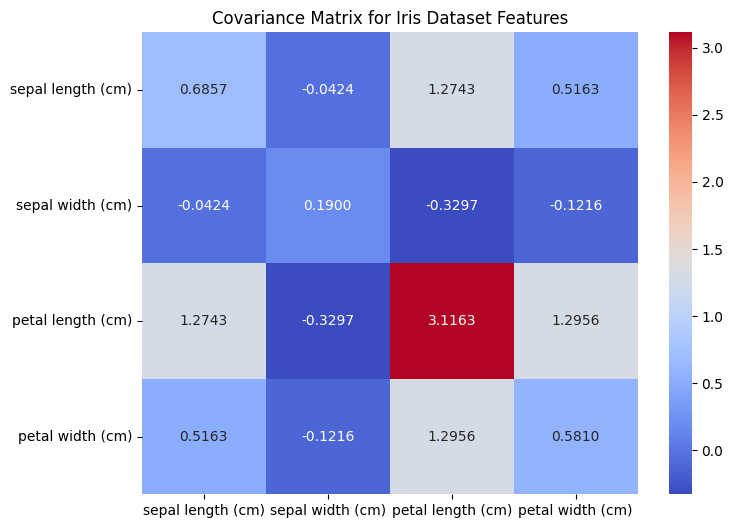

In [ ]:
X = iris_data.data  # Features

# Calculate mean vector
mean_vector = np.mean(X, axis=0)  # Finding a mean of X for axis 0 ()

# Center the data by subtracting the mean
centered_data = X - mean_vector

# Calculate the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)


# Print results
print("Mean Vector:")
print(mean_vector)

print("\nCovariance Matrix:")
print(cov_matrix)

# Plot the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".4f", cmap="coolwarm", xticklabels=iris_data.feature_names, yticklabels=iris_data.feature_names)
plt.title('Covariance Matrix for Iris Dataset Features')
plt.show()

In [ ]:
from scipy.spatial.distance import euclidean, cityblock, cosine, chebyshev

# Select two data points for demonstration
point1_index = 0
point2_index = 1

# Extract the selected data points
point1 = X[point1_index, :]
point2 = X[point2_index, :]

# Calculate Euclidean distance
euclidean_dist = euclidean(point1, point2)

# Calculate Manhattan distance (Cityblock distance)
manhattan_dist = cityblock(point1, point2)

# Calculate Cosine similarity
cosine_similarity = 1 - cosine(point1, point2)

#Calculate Chebyshev distance
chebyshev_dist = chebyshev(point1, point2)
# Print results
print(f"Point {point1_index + 1}: {point1}")
print(f"Point {point2_index + 1}: {point2}")

print("\nEuclidean Distance:")
print(euclidean_dist)

print("\nManhattan Distance (Cityblock Distance):")
print(manhattan_dist)

print("\nCosine Similarity:")
print(cosine_similarity)

print("\nChebyshev Distance:")
print(chebyshev_dist)

Point 1: [5.1 3.5 1.4 0.2]
Point 2: [4.9 3.  1.4 0.2]

Euclidean Distance:
0.5385164807134502

Manhattan Distance (Cityblock Distance):
0.6999999999999993

Cosine Similarity:
0.9985791635040219

Chebyshev Distance:
0.5


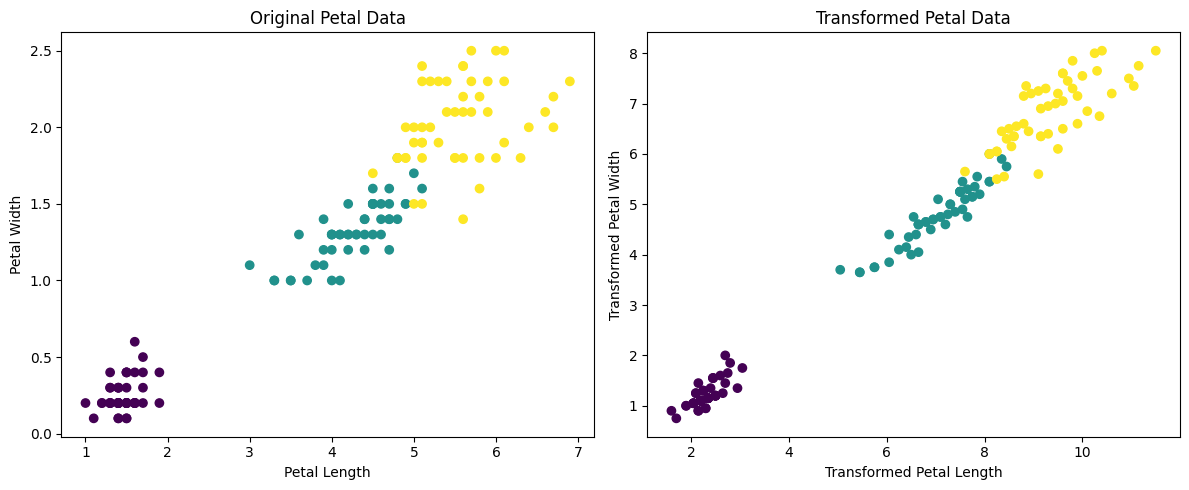

In [ ]:
X = iris_data.data[:, 2:] #petal length and width features
#define the transformation matrix
transform_matrix = np.array([[1.5, 0.5], [0.5, 2]])
#apply linear transformation using matrix multiplication
transform_data = np.dot(X, transform_matrix)
# plot original vs transformed data
plt.figure(figsize=(12, 5))
#plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data.target, cmap='viridis')
plt.title("Original Petal Data")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
#plot transformed data
plt.subplot(1, 2, 2)
plt.scatter(transform_data[:, 0], transform_data[:, 1], c=iris_data.target, cmap='viridis')
plt.title("Transformed Petal Data")
plt.xlabel('Transformed Petal Length')
plt.ylabel('Transformed Petal Width')
plt.tight_layout()
plt.show()

<h2> 3. Pre-processing the Iris dataset using probability functions</h2>

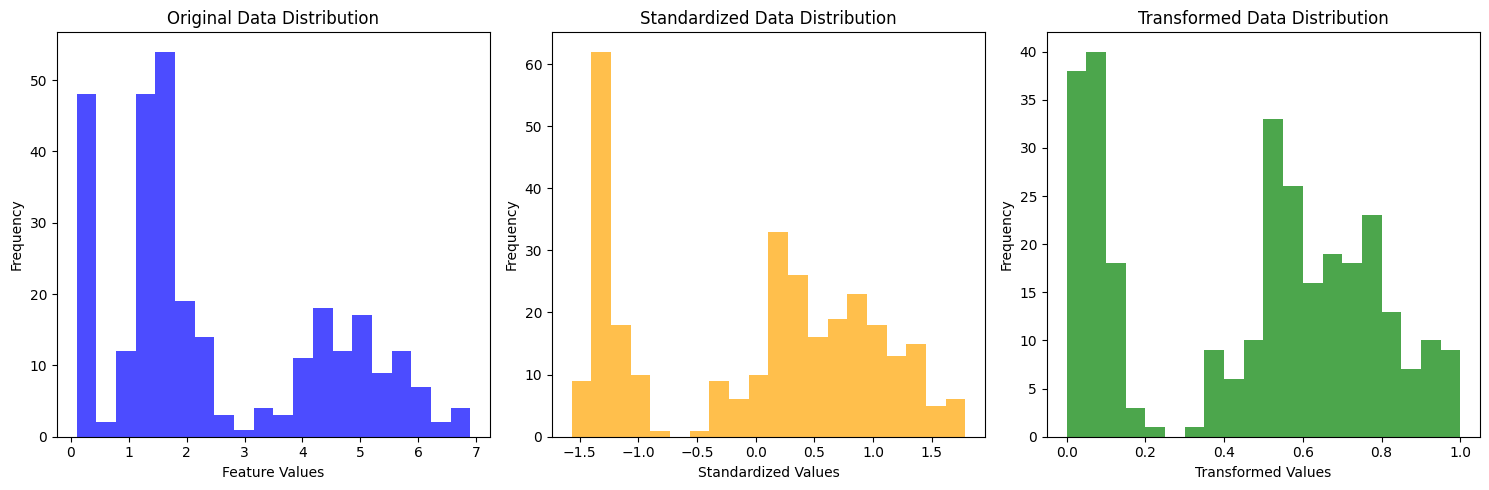

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Standardize the features using Z-score normalization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform a MinMax scaler transformation (scaling between 0 and 1)
minmax_scaler = MinMaxScaler()
X_prob_transformed = minmax_scaler.fit_transform(X_standardized)

# Plot original and preprocessed data distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axes[0].hist(X.flatten(), bins=20, color='blue', alpha=0.7)
axes[0].set_title("Original Data Distribution")
axes[0].set_xlabel("Feature Values")
axes[0].set_ylabel("Frequency")

# Plot standardized data
axes[1].hist(X_standardized.flatten(), bins=20, color='orange', alpha=0.7)
axes[1].set_title("Standardized Data Distribution")
axes[1].set_xlabel("Standardized Values")
axes[1].set_ylabel("Frequency")

# Plot MinMax scaler transformed data
axes[2].hist(X_prob_transformed.flatten(), bins=20, color='green', alpha=0.7)
axes[2].set_title("Transformed Data Distribution")
axes[2].set_xlabel("Transformed Values")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

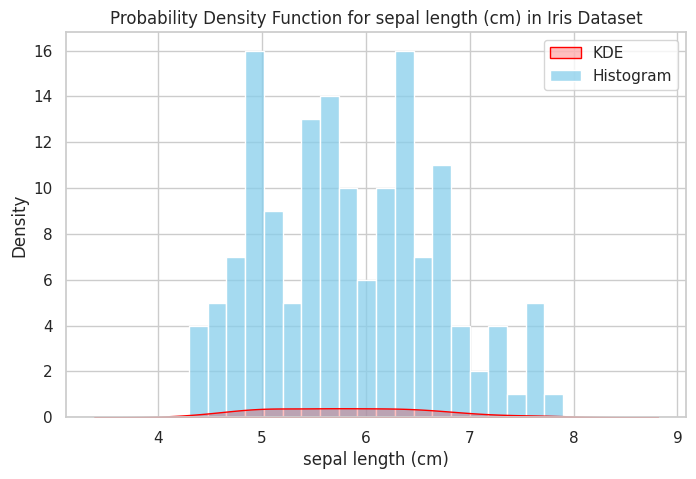

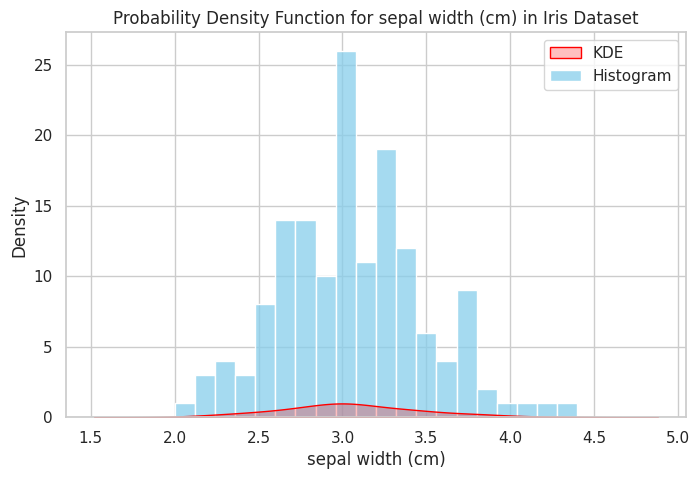

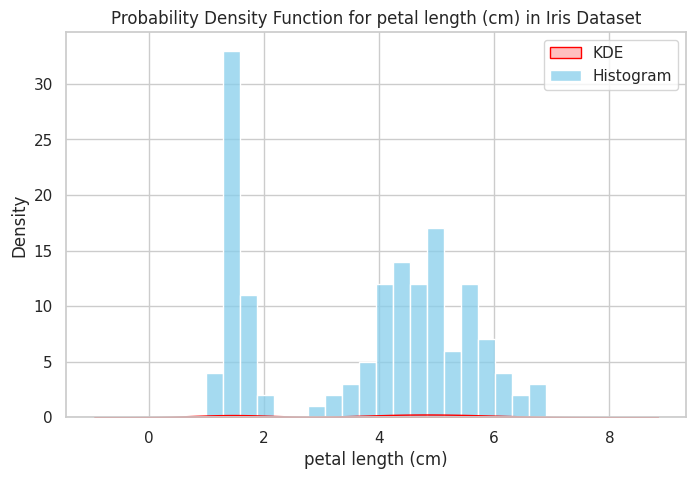

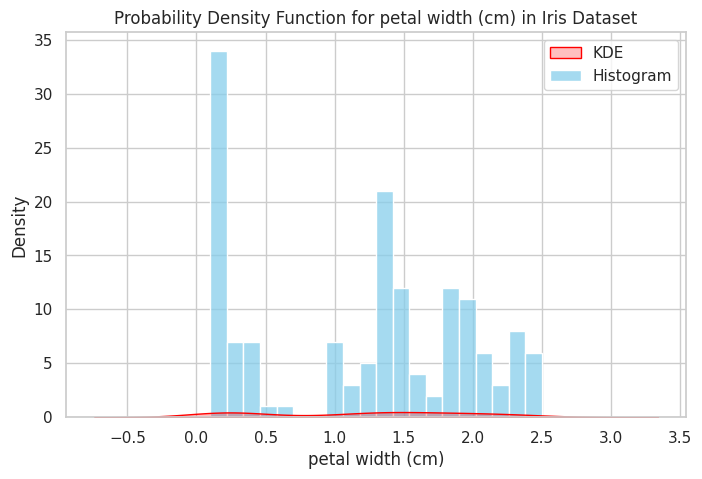

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

# Set style
sns.set(style="whitegrid")

# Plot PDF for each feature
for feature in iris_df.columns[:-2]:  # Exclude the target variable (iris_type and iris_name)
    plt.figure(figsize=(8, 5))

    # Plot the histogram
    sns.histplot(iris_df[feature], kde=False, color='skyblue', bins=20, label='Histogram')

    # Plot the KDE (Kernel Density Estimate)
    sns.kdeplot(iris_df[feature], color='red', label='KDE', fill=True)

    # Add labels and title
    plt.title(f'Probability Density Function for {feature} in Iris Dataset')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

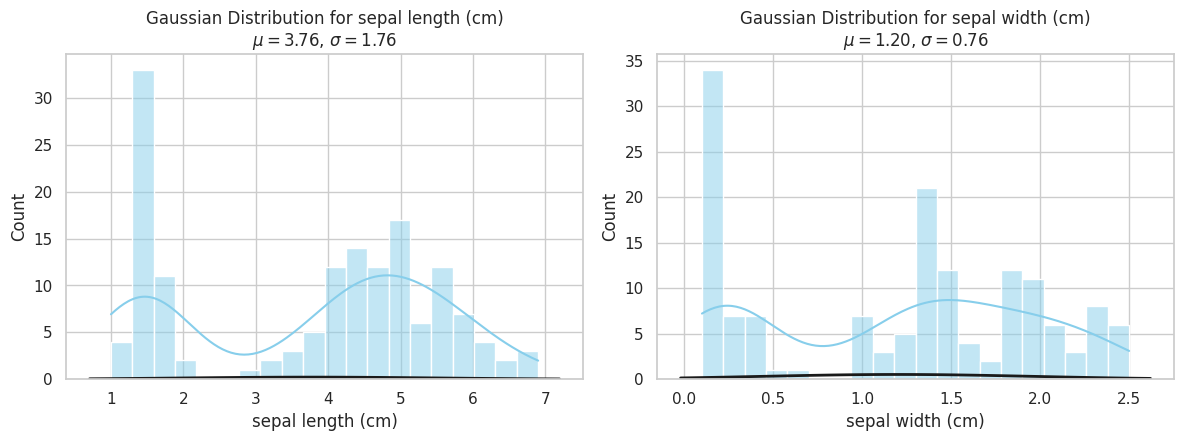

In [ ]:
from scipy.stats import norm

# plotting the dataset features to generate gaussian distribution
import pandas as pd
df = pd.DataFrame(X, columns=iris_df.columns[:-4])

# Plot Gaussian distribution for 2 features
plt.figure(figsize=(12, 8))

for i, feature in enumerate(df.columns):
    plt.subplot(2, 2, i + 1)

    # Fit a Gaussian distribution to the data
    mu, std = norm.fit(df[feature])

    # Plot the histogram
    sns.histplot(df[feature], kde=True, color='skyblue', bins=20)

    # Plot the fitted Gaussian distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f'Gaussian Distribution for {feature}\n$\mu={mu:.2f}$, $\sigma={std:.2f}$')

plt.tight_layout()
plt.show()

<h2> 4. Basic preprocessing on Iris dataset</h2>
<h3> Few preprocessing operations are as follows: </h3>
<ol>
<li> Standardize the features using Z-score normalization. </li>
<li> Scale the features between 0 and 1 using Min-Max scaling. </li>
<li> Label encode the categorical labels. </li>
<li> Perform one-hot encoding on the label-encoded labels. </li>
<li> Split the dataset into training and testing sets. </li>
</ol>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

X = iris_data.data  # Features
y = iris_data.target  # Labels

# Step 1: Standardize the features using Z-score normalization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Min-Max scaling of features
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Step 3: Label Encoding for categorical labels (e.g., Iris species)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: One-Hot Encoding for categorical labels
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
y_onehot_encoded = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print results
print("Original Features:")
print(X[:5])

print("\nStandardized Features:")
print(X_standardized[:5])

print("\nMin-Max Scaled Features:")
print(X_minmax_scaled[:5])

print("\nOriginal Labels:")
print(y[:5])

print("\nLabel Encoded Labels:")
print(y_encoded[:5])

print("\nOne-Hot Encoded Labels:")
print(y_onehot_encoded[:5])

print("\nShape of Training and Testing Sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Original Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Standardized Features:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Min-Max Scaled Features:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

Original Labels:
[0 0 0 0 0]

Label Encoded Labels:
[0 0 0 0 0]

One-Hot Encoded Labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Shape of Training and Testing Sets:
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<h2> 5. Building the KNN classifier model </h2>

Model Evaluation:
Accuracy: 0.89


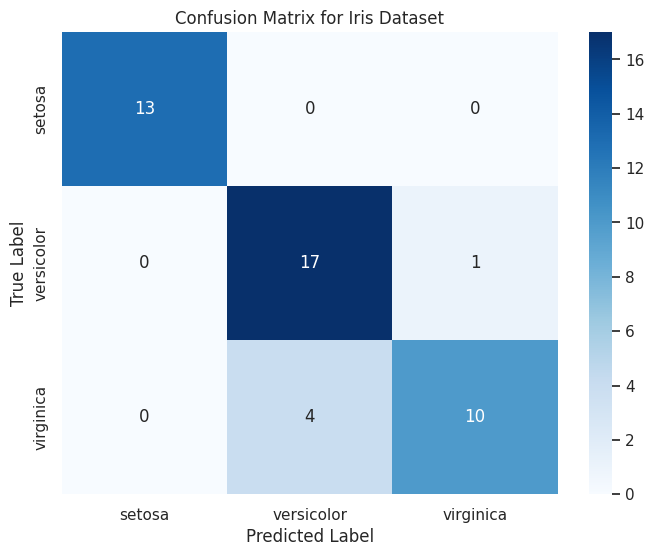


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      0.94      0.87        18
           2       0.91      0.71      0.80        14

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = iris_data.data  # Features
y = iris_data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Standardize the features using Z-score normalization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn_model.fit(X_train_standardized, y_train)

# Predict the labels for the testing set
y_pred = knn_model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred) # Explain precision recall etc

# Print evaluation metrics
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\nClassification Report:")
print(class_report)

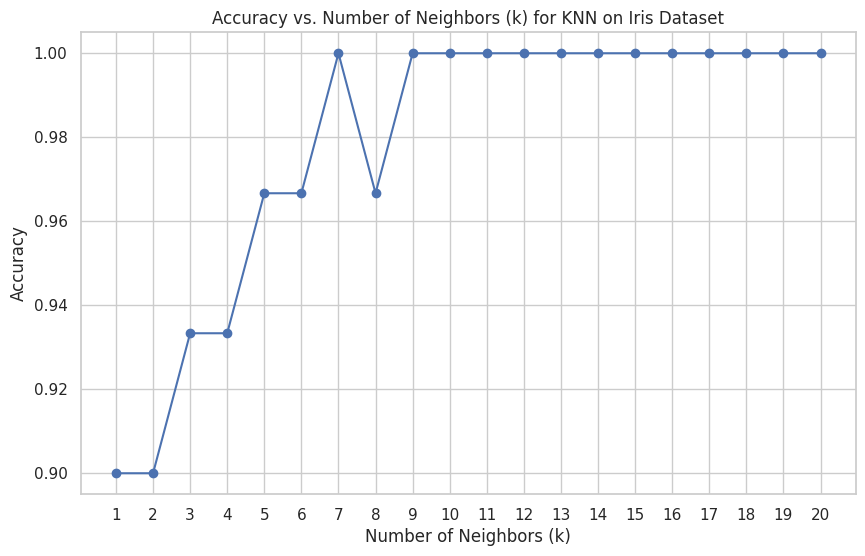

In [ ]:
# accuracy vs K plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Initialize variables for plotting
k_values = np.arange(1, 21)  # Test k values from 1 to 20
accuracy_values = []

# Iterate through different values of k
for k in k_values:
    # Train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for KNN on Iris Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

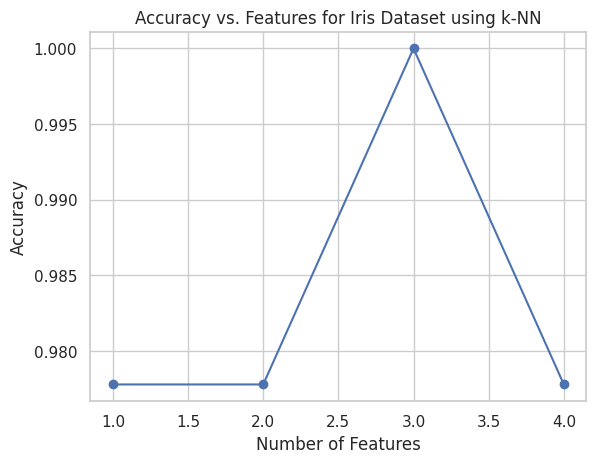

In [ ]:
# accuracy vs features plot by removing one by one features for example 1st set is (sepal length, sepal width, petal length, petal width), 2nd set is (sepal length, sepal width,
# ,petal length) like this it goes on till only one feature left.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize lists to store results
num_features = X.shape[1]
accuracy_list = []

# Iterate through features
for i in range(num_features, 0, -1):
    # Remove i-th feature
    reduced_X = np.delete(X, i-1, axis=1)

    # Split the reduced dataset
    X_train_reduced, X_test_reduced, _, _ = train_test_split(reduced_X, y, test_size=0.3, random_state=42)

    # Fit k-NN model on reduced dataset
    knn.fit(X_train_reduced, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_reduced)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy in the list
    accuracy_list.append(accuracy)

# Plotting the accuracy vs. features
plt.plot(range(1, num_features + 1), accuracy_list, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Features for Iris Dataset using k-NN')
plt.show()

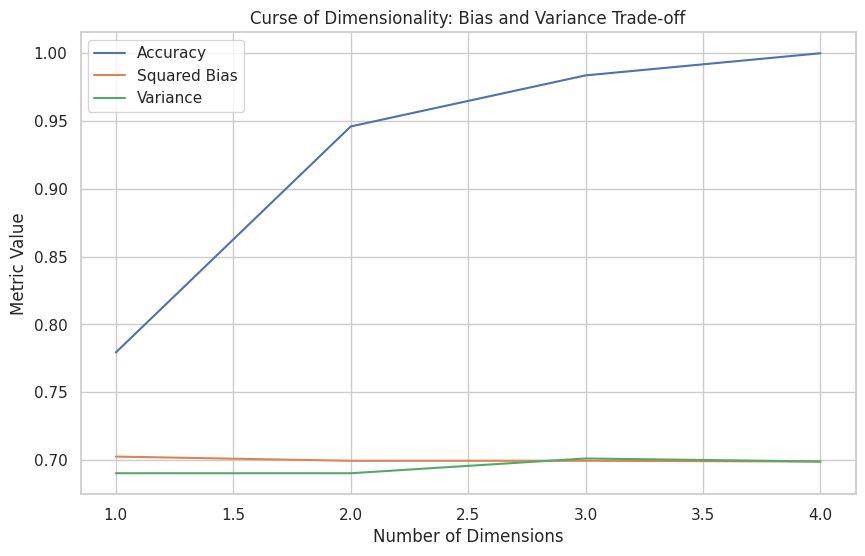

In [ ]:
#Understanding a drawback of KNN classifier due to "curse of dimensionality"
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Vary the number of dimensions (features) for analysis
dimensions = range(1, X.shape[1] + 1)

# Lists to store accuracy, bias, and variance
accuracy_list = []
bias_list = []
variance_list = []

# Repeat the experiment multiple times for robustness
num_experiments = 100

for dim in dimensions:
    accuracy_sum = 0
    squared_bias_sum = 0
    variance_sum = 0

    for _ in range(num_experiments):
        # Select a subset of dimensions
        selected_dimensions = np.random.choice(X.shape[1], dim, replace=False)
        X_subset = X[:, selected_dimensions]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

        # Train a KNN classifier
        knn_model = KNeighborsClassifier(n_neighbors=3)
        knn_model.fit(X_train, y_train)

        # Predict the labels for the testing set
        y_pred = knn_model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_sum += accuracy

        # Calculate bias and variance
        expected_prediction = np.mean(y_pred)
        squared_bias = np.mean((expected_prediction - y_test)**2)
        variance = np.var(y_pred)

        squared_bias_sum += squared_bias
        variance_sum += variance

    # Average accuracy, bias, and variance over experiments
    average_accuracy = accuracy_sum / num_experiments
    average_bias = squared_bias_sum / num_experiments
    average_variance = variance_sum / num_experiments

    accuracy_list.append(average_accuracy)
    bias_list.append(average_bias)
    variance_list.append(average_variance)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracy_list, label='Accuracy')
plt.plot(dimensions, bias_list, label='Squared Bias')
plt.plot(dimensions, variance_list, label='Variance')
plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('Curse of Dimensionality: Bias and Variance Trade-off')
plt.legend()
plt.show()

<h3> References: </h3>
<ol>
<li> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" class="wikilink">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html</a> </li>
<li> <a href="https://scikit-learn.org/stable/modules/preprocessing.html" class="wikilink">https://scikit-learn.org/stable/modules/preprocessing.html</a> </li>
</ol>    

<h3> Exercises : </h3>
<ol>
   <li> Load the diabetes dataset (available in sklearn.datasets) and use the preprocessing steps to standardize the data and provide intuition the relation of features using various preprocessing modules as per your choice. </li>    
  <li> Apply the KNN classifier on the diabetes dataset with k= 2,3,5,6 and 7 values and evaluate the model based on the dataset's standardized features. </li>
    </ol>
    